# Daily Climate Forecasting

**Daily climate data in the city of Delhi from 2013 to 2017**

https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

**Content**

The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are
meantemp, humidity, wind_speed, meanpressure.

**Acknowledgements**

This dataset has been collected from Weather Undergroud API. Dataset ownership and credit goes to them.

**Submission Deadline**

Assignment 4 must be submitted by October 19, 2019 (10:00 PM). Any kernel published after this deadline will be evaluated for only 50% of the total marks.

**Inspiration**

This dataset was developed as a part Assignment 4 of Data Analytics Course, 2019 at PES University, Bangalore

# Dataset Overview

**date** Date of format YYYY-MM-DD

**meantemp** Mean temperature averaged out from multiple 3 hour intervals in a day.

**humidity** Humidity value for the day (units are grams of water vapor per cubic meter volume of air)

**wind_speed** Wind speed measured in kmph

**meanpresure** Pressure reading of weather (measure in atm)

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import datetime

# Data Analysis & Visualization

In [2]:
train_data = pd.read_csv('data/DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('data/DailyDelhiClimateTest.csv')

In [3]:
# convert datetime object
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [4]:
train_data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [5]:
test_data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


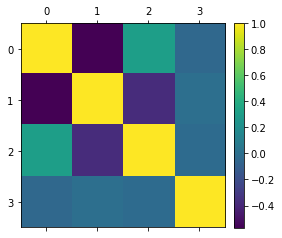

In [6]:
# Matrix Correlation
im = plt.matshow(train_data.corr())
plt.colorbar(im,fraction=0.046, pad=0.04)

In [7]:
def Visualize(kind='hist',figsize=(10,10)):
    def Col():
        cols = ['meantemp','humidity','wind_speed','meanpressure']
        for c in cols:
            yield c

    fig,axes = plt.subplots(nrows=2,ncols=2,figsize=figsize)
    col = Col()
    for i in range(2):
        for j in range(2):
            curr = next(col)
            if kind == 'hist':
                axes[i,j].hist(train_data[curr])
            elif kind == 'plot':
                axes[i,j].plot(train_data['date'],train_data[curr])
                plt.gcf().autofmt_xdate()
            axes[i,j].set_title(curr)

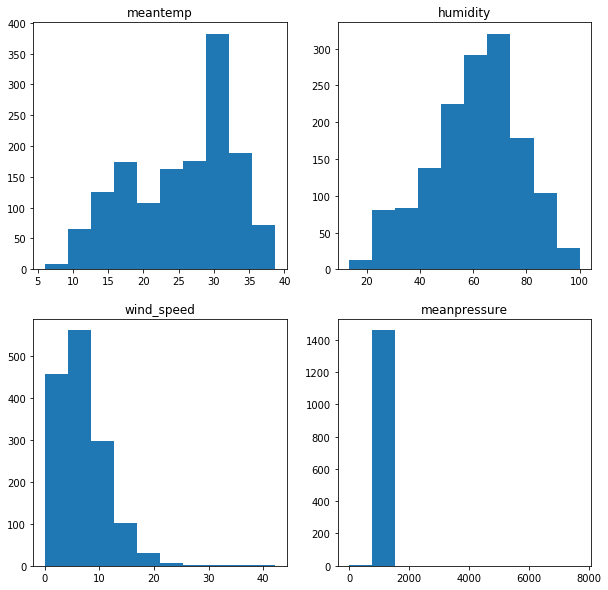

In [8]:
Visualize('hist')

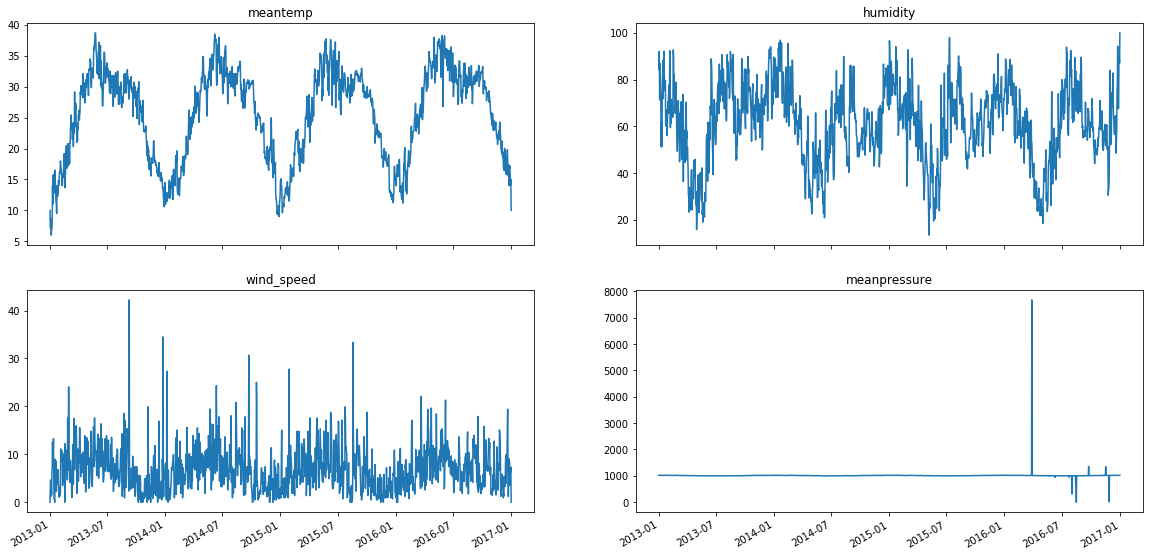

In [9]:
Visualize('plot',(20,10))

# Data Preprocessing

In [10]:
def process_data(data):
    x,y = [],[]
    switch = False
    
    if len(data)%2 == 1:
        last = False
    else:
        last = True
    
    for i in range(len(data)):
        if i == len(data)-1:
            if not last:
                break
        if switch:
            y.append(data[i])
            switch = False
        else:
            x.append(data[i])
            switch = True
    
    def reshape(d):
        d = np.array(d)
        d = np.reshape(d,(d.shape[0],1,1))
        return d
    return (reshape(x),np.array(y))

In [11]:
x_train_meantemp,y_train_meantemp = process_data(train_data.meantemp)
x_test_meantemp,y_test_meantemp = process_data(test_data.meantemp)

In [12]:
x_train_humidity,y_train_humidity = process_data(train_data.humidity)
x_test_humidity,y_test_humidity = process_data(test_data.humidity)

In [13]:
x_train_wind_speed,y_train_wind_speed = process_data(train_data.wind_speed)
x_test_wind_speed,y_test_wind_speed = process_data(test_data.wind_speed)

In [14]:
x_train_meanpressure,y_train_meanpressure = process_data(train_data.meanpressure)
x_test_meanpressure,y_test_meanpressure = process_data(test_data.meanpressure)

# Neural Network Model

In [15]:
model_meantemp = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [16]:
model_humidity = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [17]:
model_wind_speed = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [18]:
model_meanpressure = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [19]:
model_meantemp.compile(loss='mse',optimizer='adam')

In [20]:
model_humidity.compile(loss='mse',optimizer='adam')

In [21]:
model_wind_speed.compile(loss='mse',optimizer='adam')

In [22]:
model_meanpressure.compile(loss='mse',optimizer='adam')

In [23]:
model_meantemp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


# Create Callback & EarlyStopping

In [24]:
os.makedirs('logs',exist_ok=True)
logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [25]:
callback = keras.callbacks.TensorBoard(logdir)
earlyStoping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

# Training Model

In [26]:
history_humidity = model_humidity.fit(x_train_humidity,y_train_humidity,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Train on 731 samples
Epoch 1/100
731/731 - 6s - loss: 3957.2732
Epoch 2/100
731/731 - 0s - loss: 3745.5655
Epoch 3/100
731/731 - 0s - loss: 3327.1800
Epoch 4/100
731/731 - 0s - loss: 2374.5651
Epoch 5/100
731/731 - 0s - loss: 947.3622
Epoch 6/100
731/731 - 0s - loss: 315.4076
Epoch 7/100
731/731 - 0s - loss: 236.0580
Epoch 8/100
731/731 - 0s - loss: 189.7829
Epoch 9/100
731/731 - 0s - loss: 144.4329
Epoch 10/100
731/731 - 0s - loss: 112.0641
Epoch 11/100
731/731 - 0s - loss: 82.4402
Epoch 12/100
731/731 - 0s - loss: 71.8761
Epoch 13/100
731/731 - 0s - loss: 70.4994
Epoch 14/100
731/731 - 0s - loss: 66.3935
Epoch 15/100
731/731 - 0s - loss: 65.6805
Epoch 16/100
731/731 - 0s - loss: 71.8111
Epoch 17/100
731/731 - 0s - loss: 66.5082
Epoch 18/100
731/731 - 0s - loss: 64.4392
Epoch 19/100
731/731 - 0s - loss: 65.0099
Epoch 20/100
731/731 - 0s - loss: 62.6812
Epoch 21/100
731/731 - 0s - loss: 63.5447
Epoch 22/100
731/731 - 0s - loss: 63.5626
Epoch 23/100
731/731 - 0s - loss: 65.5520


In [27]:
history_meantemp = model_meantemp.fit(x_train_meantemp,y_train_meantemp,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Train on 731 samples
Epoch 1/100
731/731 - 3s - loss: 669.1432
Epoch 2/100
731/731 - 0s - loss: 569.8367
Epoch 3/100
731/731 - 0s - loss: 281.8488
Epoch 4/100
731/731 - 0s - loss: 51.4269
Epoch 5/100
731/731 - 0s - loss: 25.2540
Epoch 6/100
731/731 - 0s - loss: 13.6927
Epoch 7/100
731/731 - 0s - loss: 6.8383
Epoch 8/100
731/731 - 0s - loss: 3.7571
Epoch 9/100
731/731 - 0s - loss: 3.4983
Epoch 10/100
731/731 - 0s - loss: 3.1148
Epoch 11/100
731/731 - 0s - loss: 3.0850
Epoch 12/100
731/731 - 0s - loss: 3.0179
Epoch 13/100
731/731 - 0s - loss: 2.9502
Epoch 14/100
731/731 - 0s - loss: 2.8585
Epoch 15/100
731/731 - 0s - loss: 2.7896
Epoch 16/100
731/731 - 0s - loss: 2.8242
Epoch 17/100
731/731 - 0s - loss: 2.9534
Epoch 18/100
731/731 - 0s - loss: 2.8380


In [28]:
history_wind_speed = model_wind_speed.fit(x_train_wind_speed,y_train_wind_speed,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Train on 731 samples
Epoch 1/100
731/731 - 3s - loss: 53.8523
Epoch 2/100
731/731 - 0s - loss: 21.7246
Epoch 3/100
731/731 - 0s - loss: 17.0048
Epoch 4/100
731/731 - 0s - loss: 16.5658
Epoch 5/100
731/731 - 0s - loss: 16.4220
Epoch 6/100
731/731 - 0s - loss: 16.3398
Epoch 7/100
731/731 - 0s - loss: 16.1700
Epoch 8/100
731/731 - 0s - loss: 16.1445
Epoch 9/100
731/731 - 0s - loss: 16.3067
Epoch 10/100
731/731 - 0s - loss: 16.2886
Epoch 11/100
731/731 - 0s - loss: 16.1639


In [29]:
history_meanpressure = model_meanpressure.fit(x_train_meanpressure,y_train_meanpressure,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Train on 731 samples
Epoch 1/100
731/731 - 2s - loss: 1010260.4898
Epoch 2/100
731/731 - 0s - loss: 1000844.5515
Epoch 3/100
731/731 - 0s - loss: 955422.8167
Epoch 4/100
731/731 - 0s - loss: 802866.3040
Epoch 5/100
731/731 - 0s - loss: 485563.2936
Epoch 6/100
731/731 - 0s - loss: 137453.3916
Epoch 7/100
731/731 - 0s - loss: 9802.8551
Epoch 8/100
731/731 - 0s - loss: 3682.7627
Epoch 9/100
731/731 - 0s - loss: 3666.1839
Epoch 10/100
731/731 - 0s - loss: 3665.2780
Epoch 11/100
731/731 - 0s - loss: 3666.8184
Epoch 12/100
731/731 - 0s - loss: 3665.6151
Epoch 13/100
731/731 - 0s - loss: 3666.2858


In [30]:
def Gen_hist():
    all_hist = ['history_humidity','history_meanpressure','history_meantemp','history_wind_speed']
    for hist in all_hist:
        yield hist

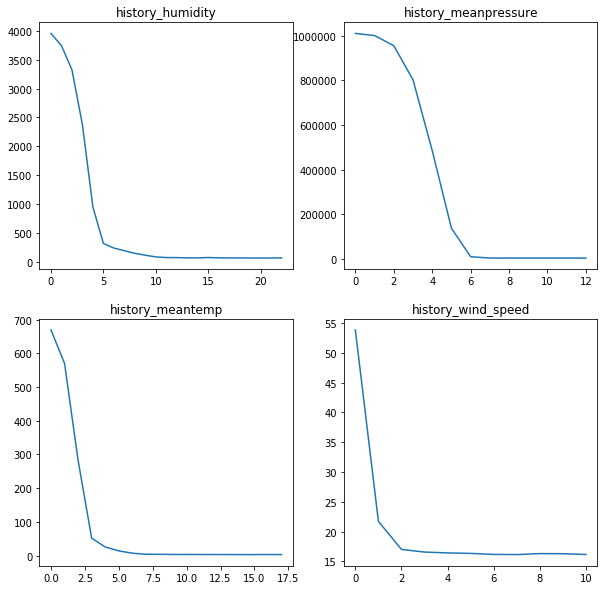

In [31]:
gen_hist = Gen_hist()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i in range(2):
    for j in range(2):
        hist_now = next(gen_hist)
        axes[i,j].plot(eval(hist_now).history['loss'])
        axes[i,j].set_title(hist_now)

# Prediction

In [32]:
def Gen_test():
    all_test = ['x_test_wind_speed','x_test_humidity','x_test_meantemp','x_test_meanpressure']
    all_y = ['y_test_wind_speed','y_test_humidity','y_test_meantemp','y_test_meanpressure']
    all_model = ['model_wind_speed','model_humidity','model_meantemp','model_meanpressure']
    for test in zip(all_test,all_y,all_model):
        yield test

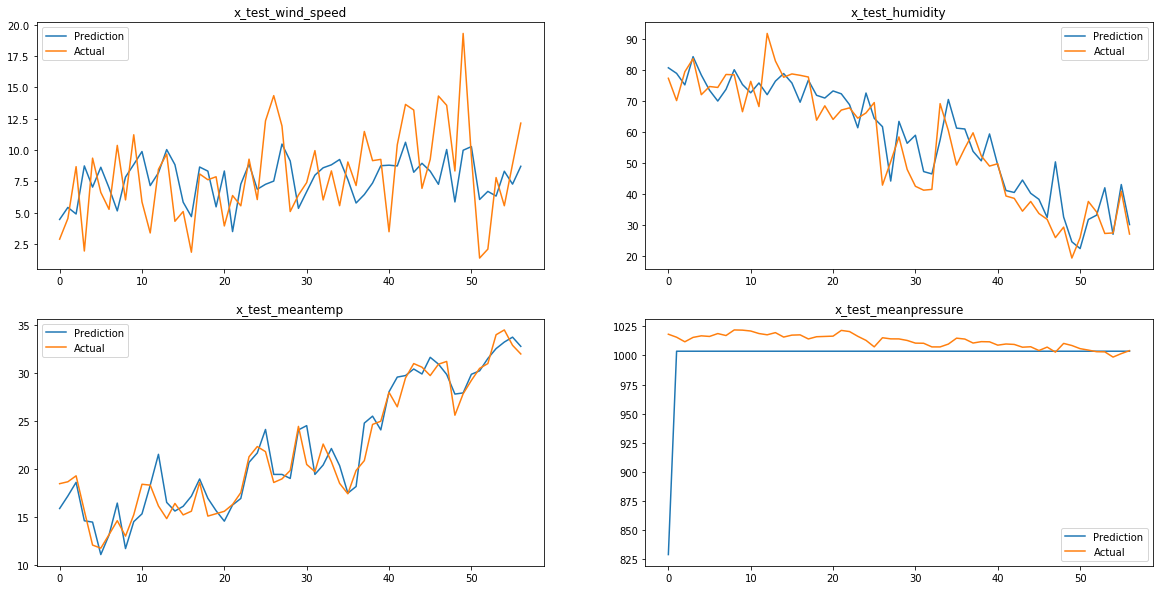

In [33]:
gen_test = Gen_test()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
for i in range(2):
    for j in range(2):
        test_now = next(gen_test)
        axes[i,j].plot(eval(test_now[2]).predict(eval(test_now[0])),label='Prediction')
        axes[i,j].plot(eval(test_now[1]),label='Actual')
        axes[i,j].set_title(test_now[0])
        axes[i,j].legend()

# Save Model

In [34]:
os.makedirs('models',exist_ok=True)

In [35]:
all_model = ['model_wind_speed','model_humidity','model_meantemp','model_meanpressure']
for model in all_model:
    eval(model).save(f'models/{model}.h5')